# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [32]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
breast_cancer=datasets.load_breast_cancer()
features=breast_cancer.data
#print(features)
print(features.shape)
features=features[:,:3]
#print(features)
print(features.shape)

(569, 30)
(569, 3)


## Step1. 下載資料

In [34]:
#breast_cancer=datasets.load_breast_cancer()
#features=breast_cancer.data
target=breast_cancer.target
#print(breast_cancer)

print('-'*20)
print(target.shape)
print(target)
#print(breast_cancer.keys())

--------------------
(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0

In [35]:
print(breast_cancer.feature_names)
feature_names = breast_cancer.feature_names
feature_names = feature_names[:3]
print(feature_names)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['mean radius' 'mean texture' 'mean perimeter']


In [36]:
X = features
print(X.shape)
X

(569, 3)


array([[ 17.99,  10.38, 122.8 ],
       [ 20.57,  17.77, 132.9 ],
       [ 19.69,  21.25, 130.  ],
       ...,
       [ 16.6 ,  28.08, 108.3 ],
       [ 20.6 ,  29.33, 140.1 ],
       [  7.76,  24.54,  47.92]])

In [37]:
y = breast_cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [38]:
target_names=breast_cancer.target_names
print(target_names)
labels=target_names[target]

['malignant' 'benign']


In [39]:
labels

array(['malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'malignant', 'benign', 'malignant', 'malignant',
       'malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign',
       'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignan

In [40]:
import pandas as pd
import numpy as np
mean_texture=features[labels=='benign',1]
print(mean_texture)
print(mean_texture.shape)
mean_perimeter=features[labels=='benign',2]
print(mean_perimeter)
print(mean_perimeter.shape)
benign=np.c_[mean_texture,mean_perimeter]
print(benign)


[14.36 15.71 12.44 18.42 16.84 14.63 22.3  21.6  16.34 18.24 18.75 19.31
 11.79 14.88 20.98 13.86 21.01 19.04 17.33 16.49 14.64 16.52 10.94 18.
 20.97 15.86 15.65 21.8  15.24 24.02 14.76 18.3  17.84 19.94 12.84 13.43
 20.52 19.4  19.29 18.33 18.54 21.26 16.99 20.76 19.65 20.19 15.83 21.53
 15.76 10.82 10.89 16.39 17.21 16.39 13.29 13.93 16.67 15.39 13.39 11.97
 17.31 15.92 14.97 14.65 18.77 15.18 17.91 20.78 20.7  15.34 13.08 15.34
 17.94 19.46 12.74 12.96 20.18 22.22 19.76  9.71 16.95 12.39 14.71 15.15
 14.45 18.06 22.22 13.06 14.92 15.11 17.19 17.39 15.9  21.41 18.22 16.33
 19.56 18.6  17.27 22.54 12.91 18.94 18.35 17.48 13.16 13.9  17.53 17.02
 13.47 15.46 15.51 23.97 27.08 33.81 15.91 21.25 27.85 15.6  15.04 18.19
 23.77 19.86 17.43 14.11 25.22 14.93 18.45 18.95 21.84 16.21 20.39 16.82
 13.04 15.67 17.36 14.16 17.84 15.18 14.02 15.7  18.4  20.76 13.12 19.96
 18.89 19.73 19.1  16.02 17.46 13.78 13.27 12.35 18.17 23.09 19.89 18.61
 18.16 24.49 15.82 14.4  12.71 13.84 19.11 15.69 13.3

In [41]:
mean_texture=features[labels=='malignant',1]
print(mean_texture)
print(mean_texture.shape)
mean_perimeter=features[labels=='malignant',2]
print(mean_perimeter)
print(mean_perimeter.shape)
malignant=np.c_[mean_texture,mean_perimeter]
print(benign)


[10.38 17.77 21.25 20.38 14.34 15.7  19.98 20.83 21.82 24.04 23.24 17.89
 24.8  23.95 22.61 27.54 20.13 20.68 22.15 14.26 23.04 21.38 16.4  21.53
 20.25 25.27 15.05 25.11 18.7  23.98 26.47 17.88 21.59 21.72 25.2  20.82
 21.58 21.35 24.81 20.28 21.81 17.6  18.66 18.7  22.02 18.57 21.59 22.15
 23.84 23.94 21.31 24.52 15.79 19.65 16.15 23.97 24.91 26.29 18.52 21.46
 24.59 22.76 19.83 23.03 19.77 24.98 15.56 19.67 16.67 22.91 20.01 17.12
 20.2  24.69 18.91 25.12 19.48 21.54 21.91 22.47 17.57 18.05 16.58 20.74
 15.94 18.15 22.04 18.8  24.68 19.63 11.89 20.11 21.87 26.57 20.31 22.41
 18.58 23.12 26.86 23.21 22.29 21.84 22.49 20.22 19.32 26.67 23.75 16.68
 20.26 22.14 18.47 25.56 23.81 16.93 21.56 32.47 20.25 22.33 19.08 27.81
 26.97 21.46 39.28 23.5  23.56 19.82 17.08 19.33 17.05 28.77 17.27 23.2
 33.56 27.06 23.06 22.13 19.38 22.07 31.12 20.99 24.48 19.98 26.6  18.18
 18.77 18.14 18.9  23.86 18.87 19.66 21.51 20.71 21.88 15.51 21.   21.43
 24.27 21.68 19.22 17.46 25.74 21.78 26.83 17.25 21.

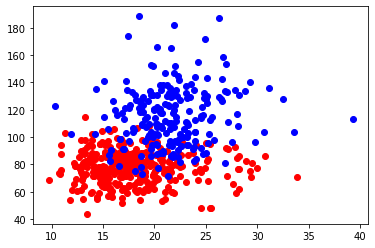

In [42]:
import matplotlib.pyplot as plt
plt.scatter(benign[:,0],benign[:,1],color='red')
plt.scatter(malignant[:,0],malignant[:,1],color='blue')



In [43]:
training_data=np.r_[benign, malignant]
print(training_data)
training_labels=np.r_[np.zeros(len(benign)),np.ones(len(malignant))]

print(training_labels)

[[ 14.36  87.46]
 [ 15.71  85.63]
 [ 12.44  60.34]
 ...
 [ 28.25 131.2 ]
 [ 28.08 108.3 ]
 [ 29.33 140.1 ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 

In [44]:
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))

In [45]:
yy

array([[ 42.79,  42.79,  42.79, ...,  42.79,  42.79,  42.79],
       [ 42.81,  42.81,  42.81, ...,  42.81,  42.81,  42.81],
       [ 42.83,  42.83,  42.83, ...,  42.83,  42.83,  42.83],
       ...,
       [189.45, 189.45, 189.45, ..., 189.45, 189.45, 189.45],
       [189.47, 189.47, 189.47, ..., 189.47, 189.47, 189.47],
       [189.49, 189.49, 189.49, ..., 189.49, 189.49, 189.49]])

## Step2. 區分訓練集與測試集

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

## Step3. 建模

In [47]:
clf=svm.SVC(kernel='rbf',gamma='auto',C=100)
clf.fit(X_train,y_train)

SVC(C=100, gamma='auto')

## Step4. 預測

```

```


In [48]:
clf.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1])

## Step5. 準確度分析

In [49]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

1.0
0.8538011695906432
